In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 22})
sns.set_style('whitegrid')

/home/boris/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/boris/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/boris/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
IMG_DIR = 'report/img'
def save_pic(name):
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, name))

In [5]:
interestng_columns = ['person_id', 'person_name', 'year', 'office_id',
           'office_name', 'income_personal', 'income_relatives']

In [60]:
officials_income = pd.read_csv('data/officials_income.csv')
officials_income.head()

,person_id,person_name,income
0,8,Зюганов Геннадий Андреевич,20453218.69
1,9,Алферов Жорес Иванович,81462661.75
2,10,Андреев Андрей Анатольевич,14475607.50
3,12,Афонин Юрий Вячеславович,23774458.69
4,13,Гаврилов Сергей Анатольевич,19608057.29


In [61]:
officials_income.shape

(49032, 3)

In [62]:
outliers = officials_income[
    (
        officials_income.income < officials_income.income.mean() - 3 * officials_income.income.std() 
    ) 
    |
    (
        officials_income.income > officials_income.income.mean() + 3 * officials_income.income.std()
    )
]
outliers.head()

,person_id,person_name,income
21,31,Муравленко Сергей Викторович,1.392346e+09
27,40,Гартунг Валерий Карлович,4.114245e+08
66,83,Петров Сергей Анатольевич,4.985721e+08
78,96,Маркин Эдуард Витальевич,2.426661e+08
84,103,Селезнев Валерий Сергеевич,4.057210e+08


In [76]:
declarations_df_source = pd.read_csv('data/declarations.csv')
declarations_df_source.head()

,person_id,person_name,year,office_id,office_name,income_personal,income_relatives
0,8,Зюганов Геннадий Андреевич,2013,14,Государственная Дума,3194615.67,198267.22
1,8,Зюганов Геннадий Андреевич,2014,14,Государственная Дума,4460788.41,190086.74
2,8,Зюганов Геннадий Андреевич,2015,14,Государственная Дума,6538890.04,183815.19
3,8,Зюганов Геннадий Андреевич,2016,14,Государственная Дума,5499187.78,187567.64
4,9,Алферов Жорес Иванович,2013,14,Государственная Дума,16647820.37,1485698.88


In [77]:
declarations_df_source.shape

(76318, 7)

Remove outliers

In [81]:
declarations_df = declarations_df_source[~declarations_df_source.person_id.isin(outliers.person_id)]
declarations_df.shape

(75732, 7)

In [82]:
declarations_df['income'] = declarations_df['income_personal'] + declarations_df['income_relatives']

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
declarations_df.sample(5)

,person_id,person_name,year,office_id,office_name,income_personal,income_relatives,income
32490,19109,Шаброва Елена Николаевна,2014,6104,Департамент бухгалтерского учета,794998.21,0.00,794998.21
56026,35842,Печенкин Андрей Владимирович,2014,3932,ГУФСИН Республика Коми,1665794.36,0.00,1665794.36
8742,5638,Ляпакин Вячеслав Викторович,2013,1150,Администрация Василеостровского района,932272.15,2024023.02,2956295.17
13044,8568,Абалихина Светлана Владимировна,2016,5971,Департамент торговли и услуг города Москвы,1951400.00,819783.00,2771183.00
62324,40124,Бернгардт Иван Иосифович,2015,607,Министерство сельского хозяйства,618259.00,171745.00,790004.00


In [84]:
declarations_df.shape

(75732, 8)

In [85]:
declarations_df['office_name_sep'] = declarations_df.office_name.apply(lambda x: x.replace(' ', '\n')) # For plotting

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
office_names = declarations_df[['office_id', 'office_name']].drop_duplicates().reset_index(drop=True)
office_names.index = office_names.office_id
office_names = office_names.drop(['office_id'], axis=1)
office_names

,office_name
office_id,
14,Государственная Дума
267,Законодательное собрание Алтайского края
211,Губернатор Иркутской области
1575,Новосибирск - городской округ
5,Совет Федерации
15,Счетная палата
1,Законодательное собрание Санкт-Петербурга
3,Центральная избирательная комиссия
549,Законодательное собрание Ленинградской области


In [87]:
office_names_sep = declarations_df[['office_id', 'office_name_sep']].drop_duplicates().reset_index(drop=True)
office_names_sep.index = office_names_sep.office_id
office_names_sep = office_names_sep.drop(['office_id'], axis=1)
office_names_sep

,office_name_sep
office_id,
14,Государственная\nДума
267,Законодательное\nсобрание\nАлтайского\nкрая
211,Губернатор\nИркутской\nобласти
1575,Новосибирск\n-\nгородской\nокруг
5,Совет\nФедерации
15,Счетная\nпалата
1,Законодательное\nсобрание\nСанкт-Петербурга
3,Центральная\nизбирательная\nкомиссия
549,Законодательное\nсобрание\nЛенинградской\nобласти


# Plan
## Meta
* Total declarations
* Declarations by year
* Declarations by office

## Basic info 
* Total people
* Total offices
* People distribution by years
* People distribution by office
* People distribution by years by office

## Declared assets
* Income, distributions
    * By year
* Richest people by year
    * Top 10 richest people in each year
* Median incomes by office
* Income vs years worked


# Meta

In [88]:
print(declarations_df.shape)

(75732, 9)


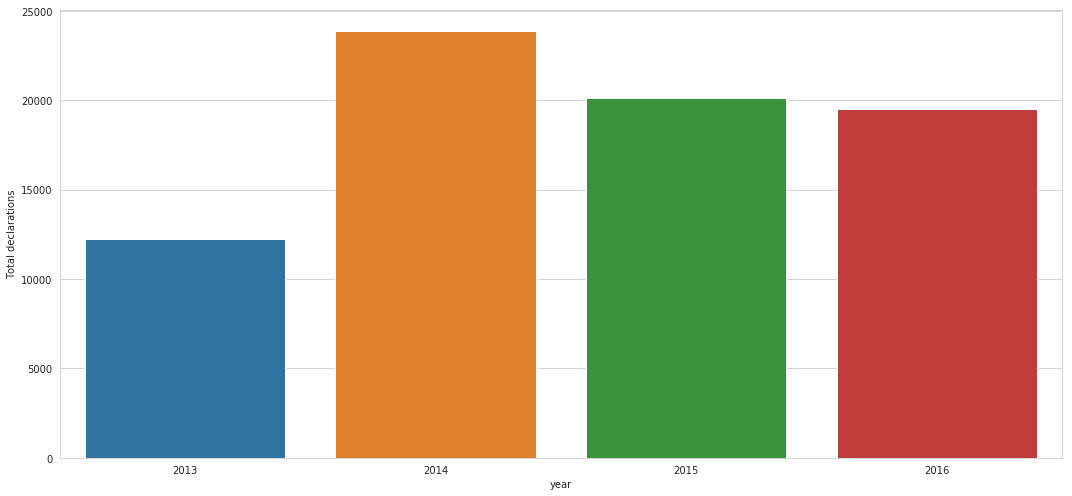

In [89]:
dec_count = declarations_df.groupby(['year'])['person_id'].count()
plt.figure(figsize=(15, 7))
sns.barplot(dec_count.index, dec_count)
plt.ylabel('Total declarations')
save_pic('total_dec')
plt.show()

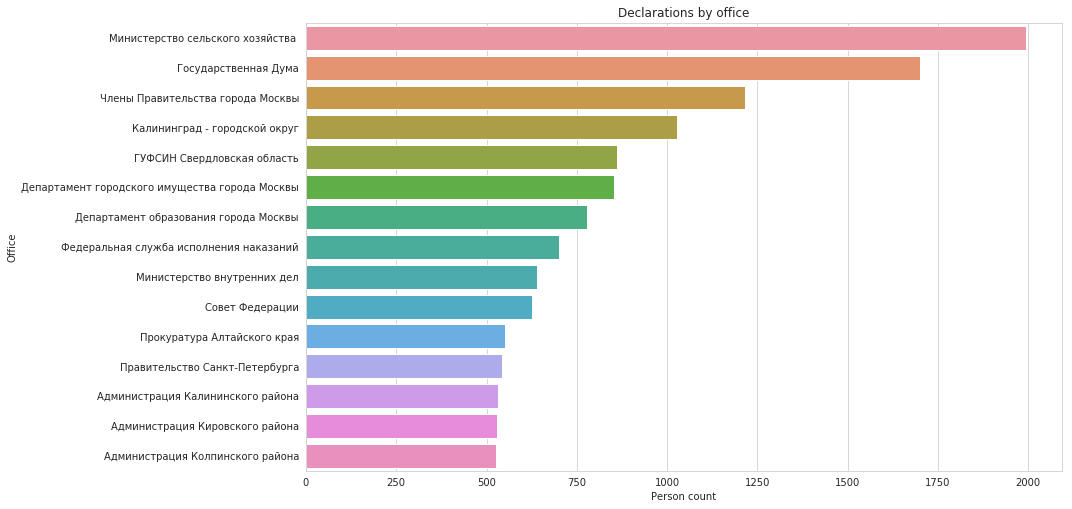

In [90]:
dec_count = declarations_df.groupby(['office_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office')
plt.xlabel('Person count')
save_pic('dec_by_office')
plt.title('Declarations by office')
plt.show()

# People distribution, offices

In [91]:
print('Unique persons', declarations_df.person_id.unique().shape[0])
print('Unique offices', declarations_df.office_id.unique().shape[0])

Unique persons 48833
Unique offices 2089


Top 10 offices by unique people


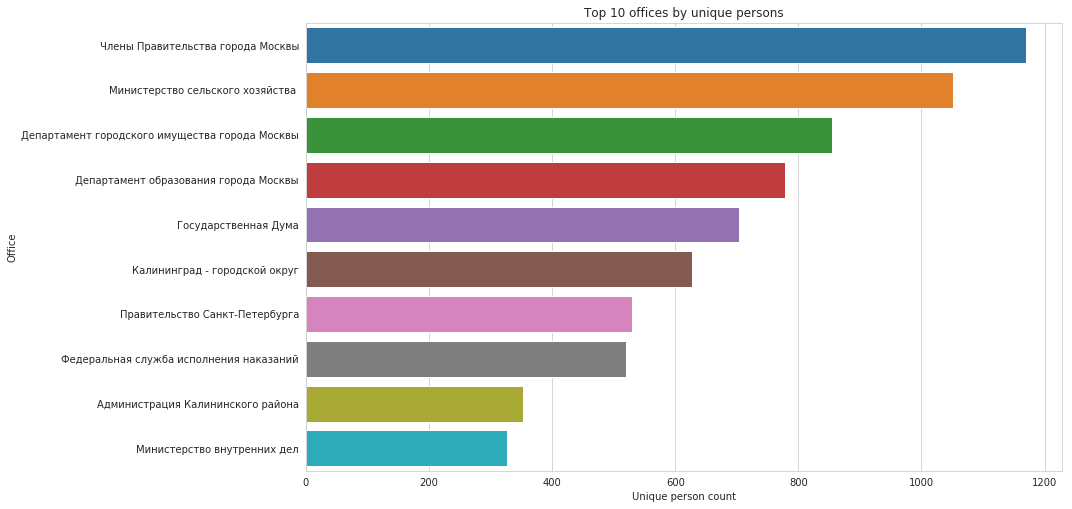

In [92]:
print('Top 10 offices by unique people')
unique_per_office = declarations_df.groupby(['office_id'])['person_id'].nunique().sort_values(ascending=False)

to_plot = unique_per_office.head(10)
plt.figure(figsize=(15, 7))
sns.barplot(y=office_names.loc[to_plot.index].values.flatten(), x=to_plot.values)
plt.ylabel('Office')
plt.xlabel('Unique person count')
save_pic('unique_by_office')
plt.title('Top 10 offices by unique persons')
plt.show()

People per year per office


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


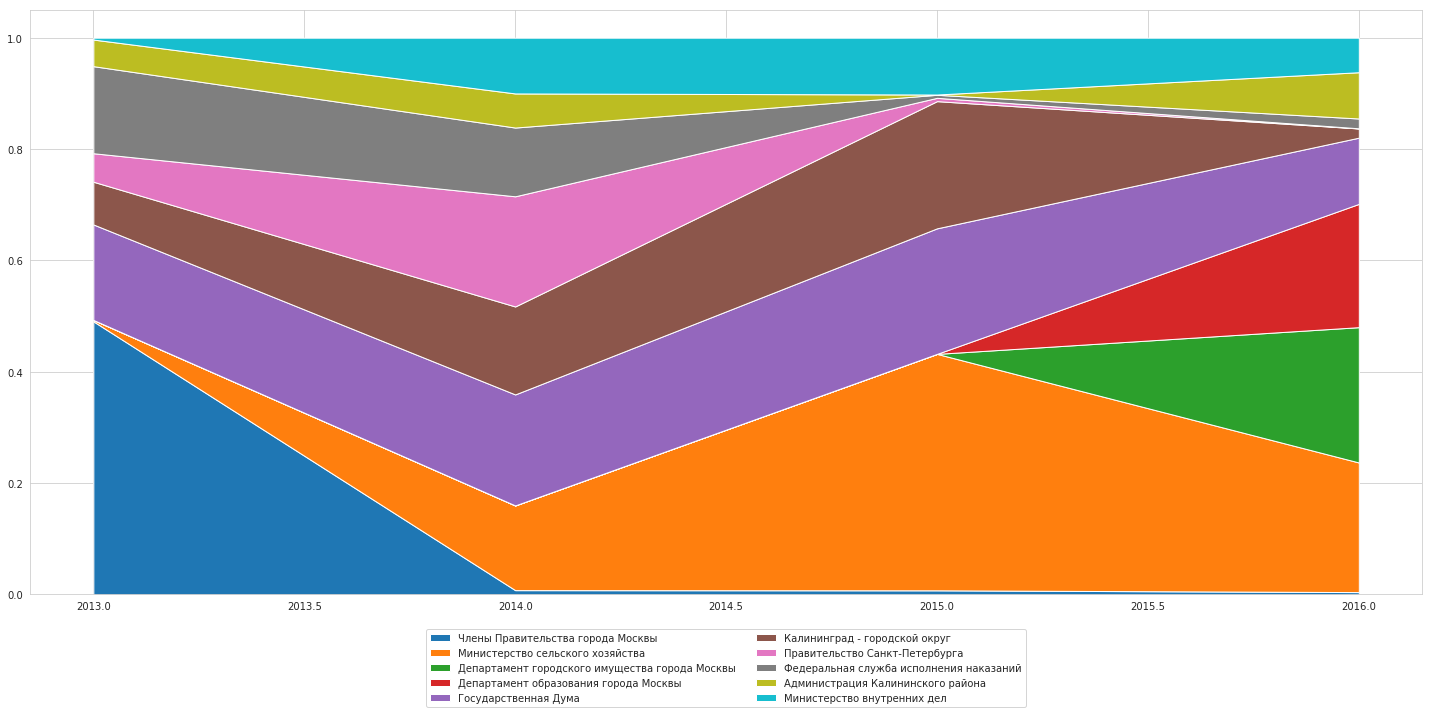

In [93]:
print('People per year per office')

years=sorted(declarations_df.year.unique())

top_offices = np.array(unique_per_office.head(10).index)


grouped = declarations_df.groupby(['office_id', 'year'])['person_id'].nunique()
grouped.head()
y = []
for office in top_offices:
    vals = grouped[office]
    vals = vals.reindex(years, fill_value=0)
    vals.name = office
    y.append(vals)
    
y = pd.DataFrame(y).T
y = y.divide(y.sum(axis=1), axis=0)
labels = office_names.ix[top_offices].values.flatten()
plt.figure(figsize=(20, 10))
plt.stackplot(years,y.T.values, labels=labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
save_pic('unique_by_year_by_office')
plt.show()

# Declared assets

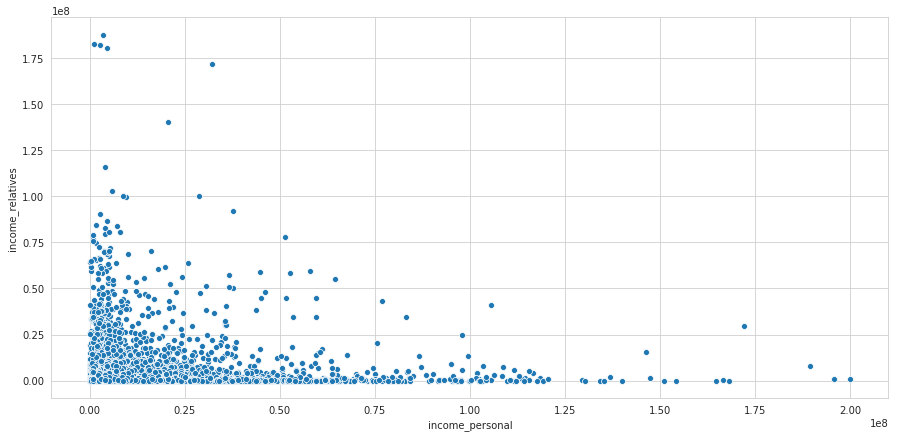

In [95]:
plt.figure(figsize=(15, 7))
sns.scatterplot(declarations_df['income_personal'], declarations_df['income_relatives'])
plt.show()

In [96]:
income_sum = declarations_df.groupby(['person_id'])['income'].sum()
print(income_sum.shape)
income_sum.head()

(48833,)


person_id
8     20453218.69
9     81462661.75
10    14475607.50
12    23774458.69
13    19608057.29
Name: income, dtype: float64

In [97]:
income_sum = income_sum.sort_values(ascending=False)

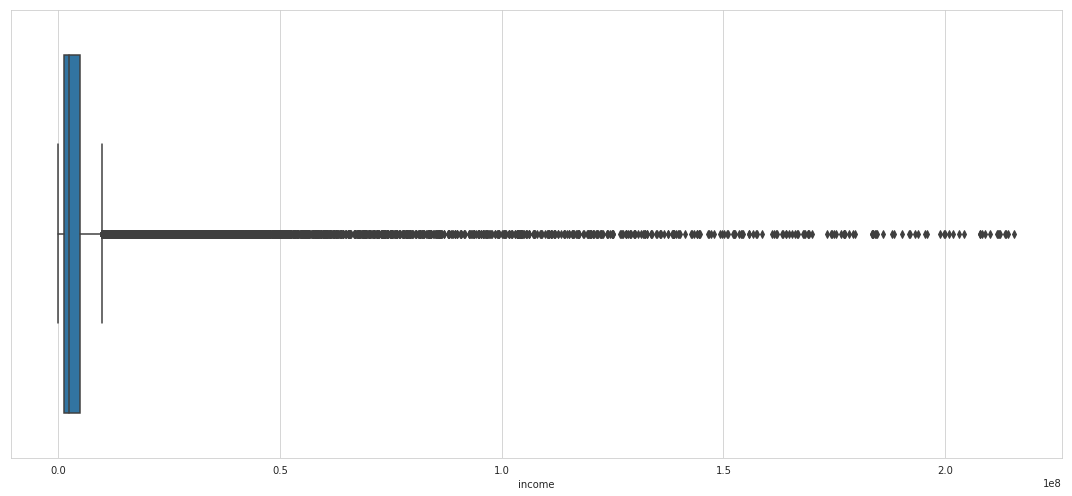

In [98]:
plt.figure(figsize=(15, 7))
sns.boxplot(income_sum)
save_pic('income_boxplot_1')
plt.show()

### Income
* Total income per year
* Median income per year
* Median income per office
* Top offices by median income, per year

In [99]:
yearly_assets_sum = declarations_df.groupby(['year']).sum()
yearly_assets_sum.head()

,person_id,office_id,income_personal,income_relatives,income
year,,,,,
2013,222407717,23181927,2.834164e+10,8.944509e+09,3.728615e+10
2014,502362569,52534592,6.661738e+10,1.886791e+10,8.548529e+10
2015,438684666,26914643,6.515230e+10,1.833866e+10,8.349096e+10
2016,685767820,56789055,5.564579e+10,1.662718e+10,7.227297e+10


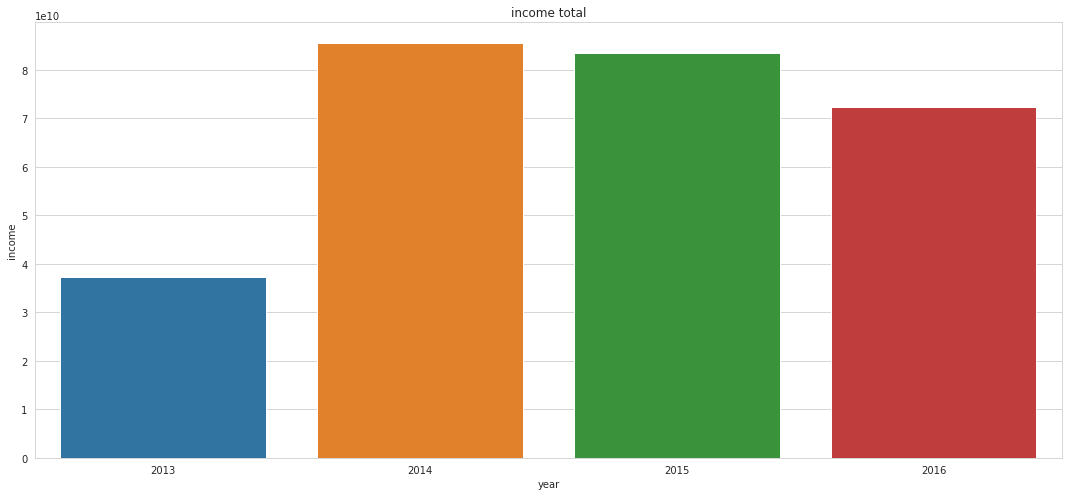

In [100]:
plt.figure(figsize=(15, 7))
plt.title('income total')
sns.barplot(yearly_assets_sum.index, yearly_assets_sum.income)
save_pic('income_by_years')
plt.show()

In [103]:
yearly_assets_median = declarations_df.groupby(['year']).median()
yearly_assets_median.head()

,person_id,office_id,income_personal,income_relatives,income
year,,,,,
2013,11246,1157,1250676.51,188058.70,1622346.00
2014,17923,1307,1352960.00,218250.95,1761510.00
2015,22305,924,1618484.62,204000.00,2070764.13
2016,41079,1404,1585446.29,186682.79,2078507.00


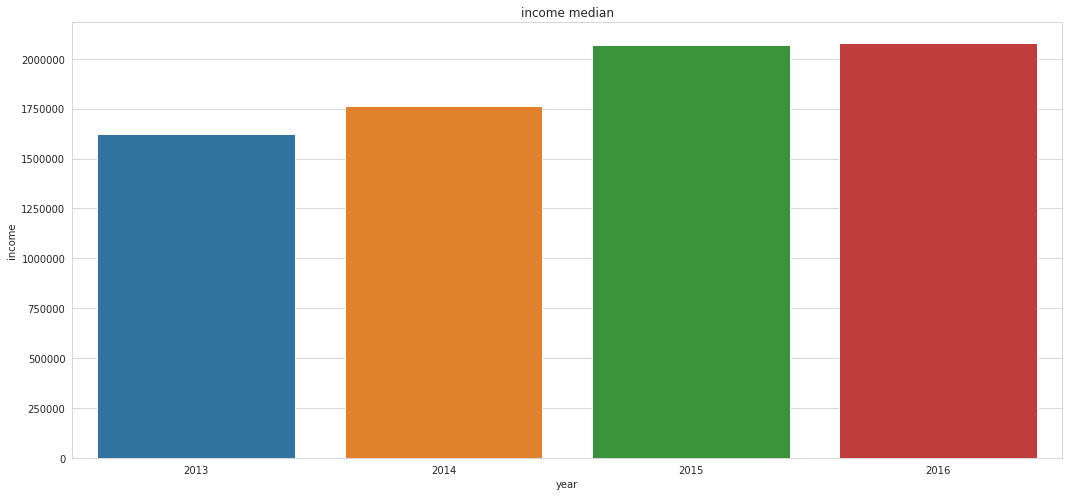

In [105]:
plt.figure(figsize=(15, 7))
plt.title('income median')
sns.barplot(yearly_assets_median.index, yearly_assets_median.income)
save_pic('income_by_years_med')
plt.show()   

In [106]:
office_people_counts = declarations_df.groupby(['office_id'])['person_id'].count().sort_values(ascending=False)
big_offices = office_people_counts[office_people_counts > office_people_counts.quantile(0.75)] # over 35 people in office 
big_offices.shape

(512,)

In [107]:
big_office_declarations = declarations_df[declarations_df.office_id.isin(big_offices.index)]
print(big_office_declarations.shape)
big_office_declarations.head()

(60932, 9)


,person_id,person_name,year,office_id,office_name,income_personal,income_relatives,income,office_name_sep
0,8,Зюганов Геннадий Андреевич,2013,14,Государственная Дума,3194615.67,198267.22,3392882.89,Государственная\nДума
1,8,Зюганов Геннадий Андреевич,2014,14,Государственная Дума,4460788.41,190086.74,4650875.15,Государственная\nДума
2,8,Зюганов Геннадий Андреевич,2015,14,Государственная Дума,6538890.04,183815.19,6722705.23,Государственная\nДума
3,8,Зюганов Геннадий Андреевич,2016,14,Государственная Дума,5499187.78,187567.64,5686755.42,Государственная\nДума
4,9,Алферов Жорес Иванович,2013,14,Государственная Дума,16647820.37,1485698.88,18133519.25,Государственная\nДума


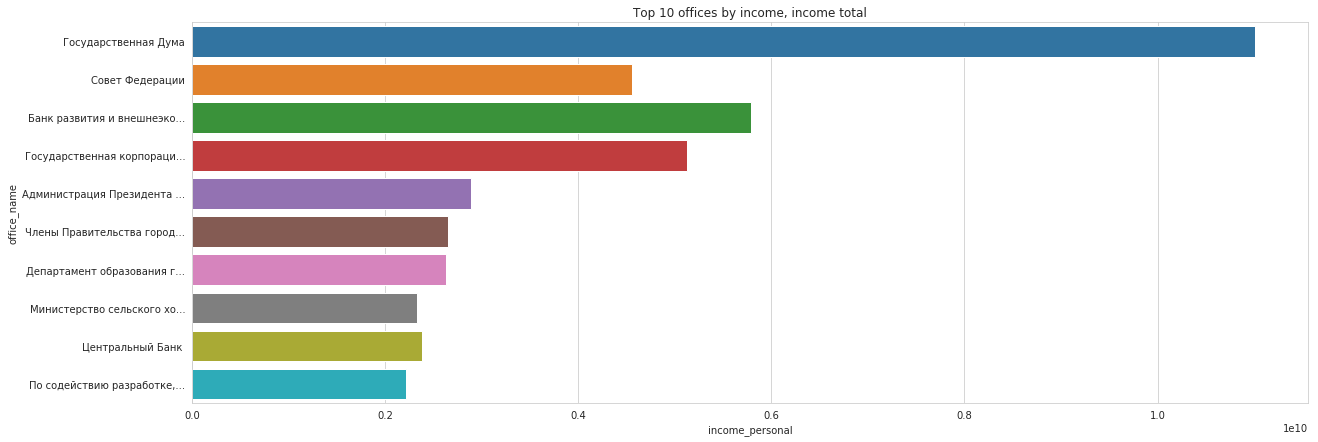

In [114]:
# Total income per office
office_assets_sum = declarations_df.groupby(['office_name']).sum().sort_values(by='income', ascending=False)
office_assets_sum.head()
to_plot = pd.DataFrame(office_assets_sum.head(10).reset_index())
to_plot['office_name'] = to_plot['office_name'].apply(lambda x: x[:25]+'...' if len(x) > 25 else x)
plt.figure(figsize=(20, 7))
plt.title('Top 10 offices by income, income total')
sns.barplot(y=to_plot.office_name, x=to_plot.income_personal)
# save_pic('office_incomes')
plt.show()

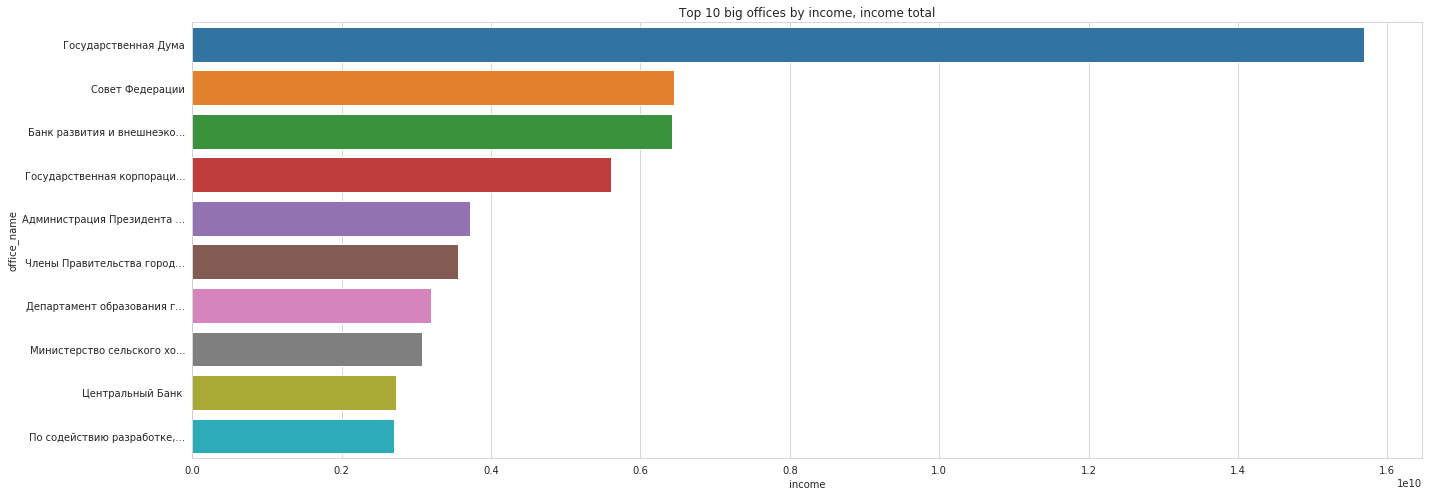

In [115]:
# Total income per office, only big offices
office_assets_sum = big_office_declarations.groupby(['office_name']).sum().sort_values(by='income', ascending=False)
to_plot = pd.DataFrame(office_assets_sum.head(10).reset_index())
to_plot['office_name'] = to_plot['office_name'].apply(lambda x: x[:25]+'...' if len(x) > 25 else x)
plt.figure(figsize=(20, 7))
plt.title('Top 10 big offices by income, income total')
sns.barplot(y=to_plot.office_name, x=to_plot.income)
save_pic('big_office_incomes')
plt.show()

In [116]:
# Median income per office
office_assets_median = big_office_declarations.groupby(['office_name']).median().sort_values(by='income', ascending=False)
office_assets_median.head()

,person_id,year,office_id,income_personal,income_relatives,income
office_name,,,,,,
Законодательное Собрание Ямало-Ненецкого автономного округа,15341.0,2015.0,954.0,1.835870e+07,946923.350,1.898945e+07
Министерство финансов,11671.0,2016.0,604.0,1.517892e+07,19326.470,1.620805e+07
Центральный Банк,41996.5,2016.0,612.0,1.369956e+07,471896.500,1.450547e+07
"Государственная корпорация по атомной энергии ""Росатом""",38416.0,2015.0,969.0,1.160034e+07,358308.205,1.244752e+07
Правительство РФ,1224.0,2014.0,453.0,7.122940e+06,1531444.000,1.229098e+07


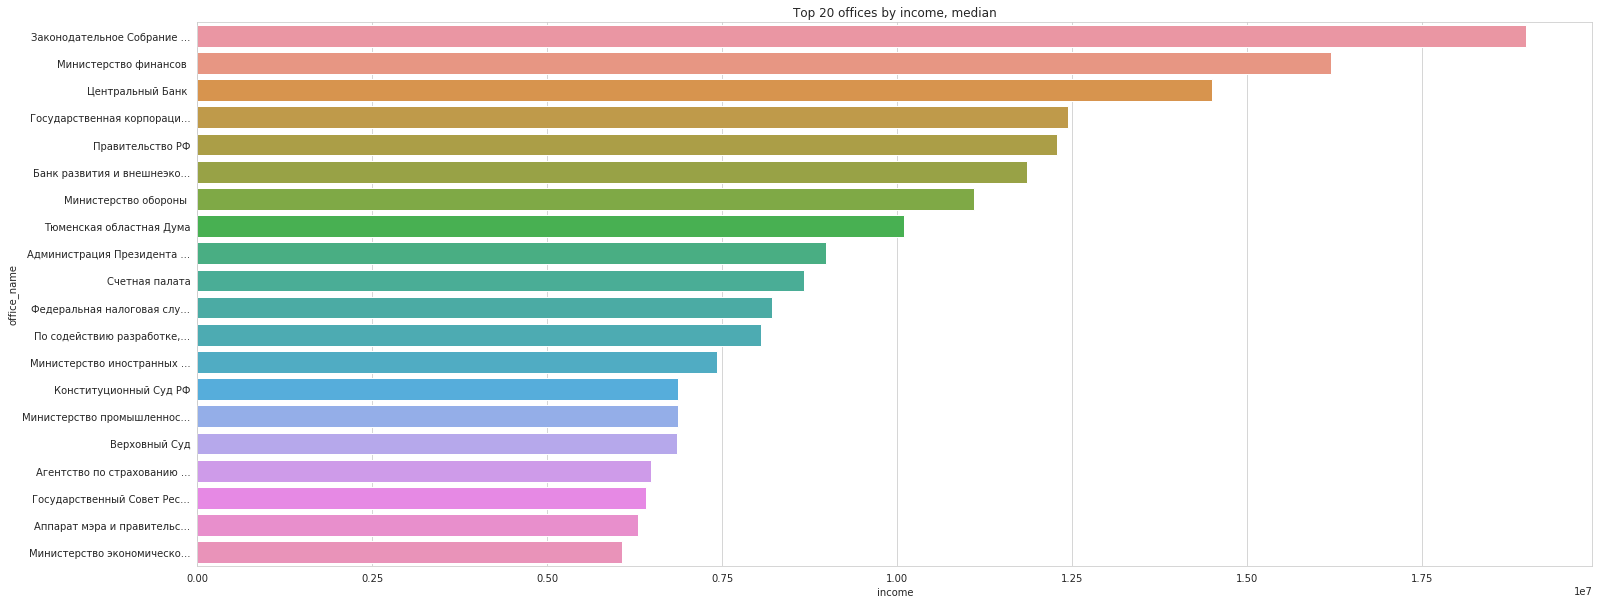

In [117]:
to_plot = office_assets_median.reset_index().head(20)
to_plot['office_name'] = to_plot.office_name.apply(lambda x: x[:25]+'...' if len(x) > 25 else x)
plt.figure(figsize=(25, 10))
plt.title('Top 20 offices by income, median')
sns.barplot(y=to_plot.office_name, x=to_plot.income)
plt.show()

Income per year per office


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


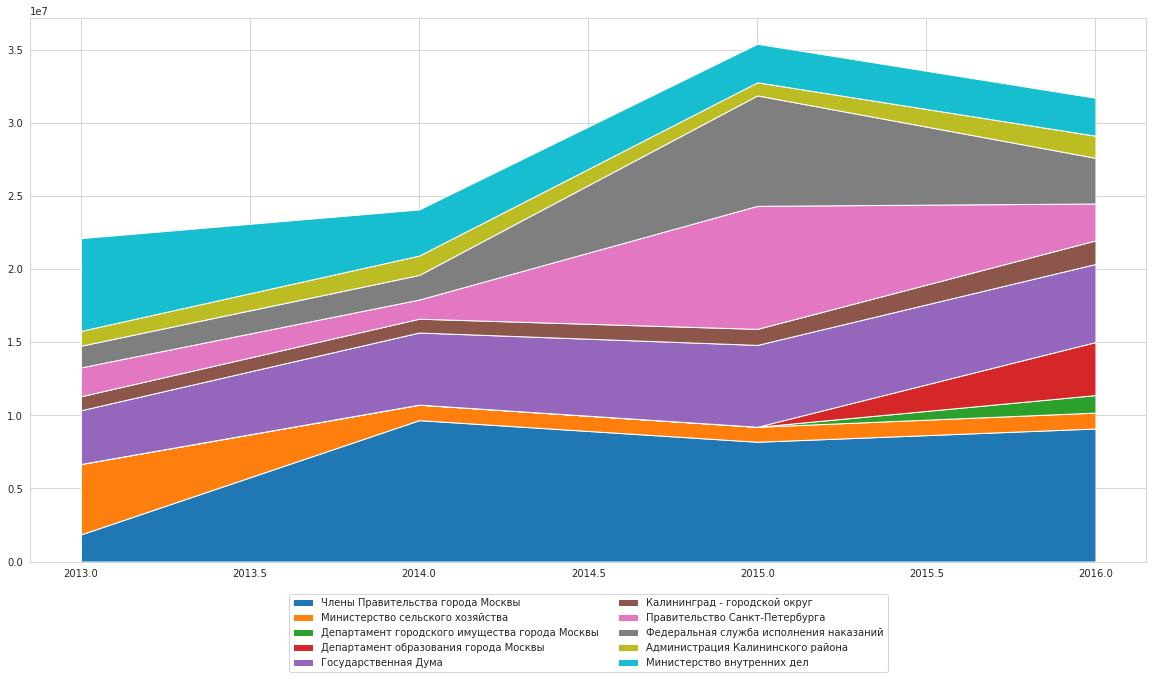

In [118]:
print('Income per year per office')

years=sorted(declarations_df.year.unique())

top_offices = np.array(unique_per_office.head(10).index)


grouped = declarations_df.groupby(['office_id', 'year'])['income'].median()
grouped.head()
# Incomes per year per office
y = []
for office in top_offices:
    vals = grouped[office]
    vals = vals.reindex(years, fill_value=0)
    vals.name = office
    y.append(vals)
    
labels = office_names.ix[top_offices].values.flatten()
plt.figure(figsize=(20, 10))
plt.stackplot(years,y, labels=labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()

In [119]:
grouped.head()
g = grouped.reset_index()
g = g[g.office_id.isin(top_offices)]
g['office_name'] = office_names.ix[g.office_id].values.flatten()
g.head()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,office_id,year,income,office_name
11,4,2013,6340228.085,Министерство внутренних дел
12,4,2014,3152704.225,Министерство внутренних дел
13,4,2015,2630482.185,Министерство внутренних дел
14,4,2016,2592688.820,Министерство внутренних дел
28,14,2013,3671954.190,Государственная Дума


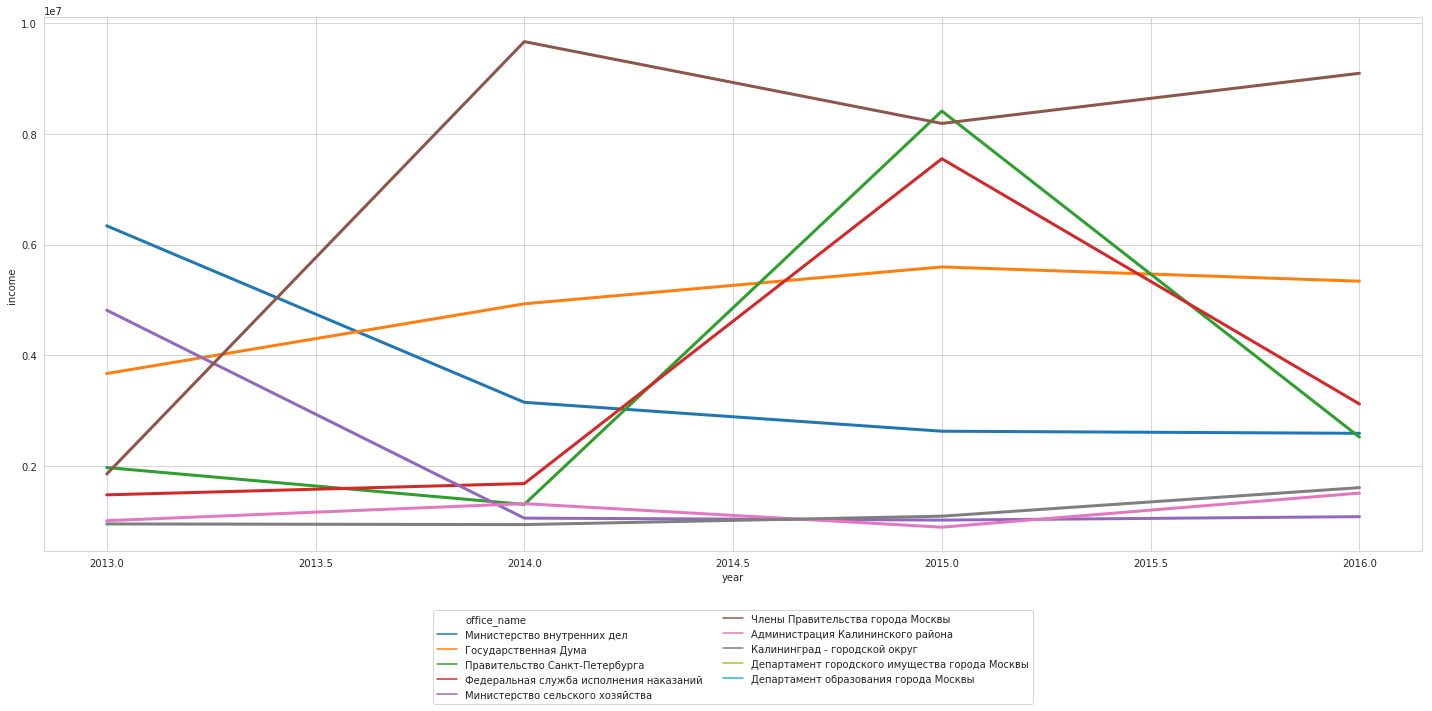

In [120]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y='income', hue='office_name', data=g, lw=3, markers=True, estimator=None)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
save_pic('income_by_year_by_office_med')
plt.show()

In [121]:
# Median income per office in 2016
# office_assets_median = big_office_declarations[big_office_declarations.year == 2016].groupby(['office_name']).median().sort_values(by='income', ascending=False)
# office_assets_median.head()
# to_plot = office_assets_median.head(10)
# plt.figure(figsize=(20, 7))
# plt.title('Top 10 offices by income, median, 2016')
# sns.barplot(to_plot.index, to_plot.income)
# plt.show()

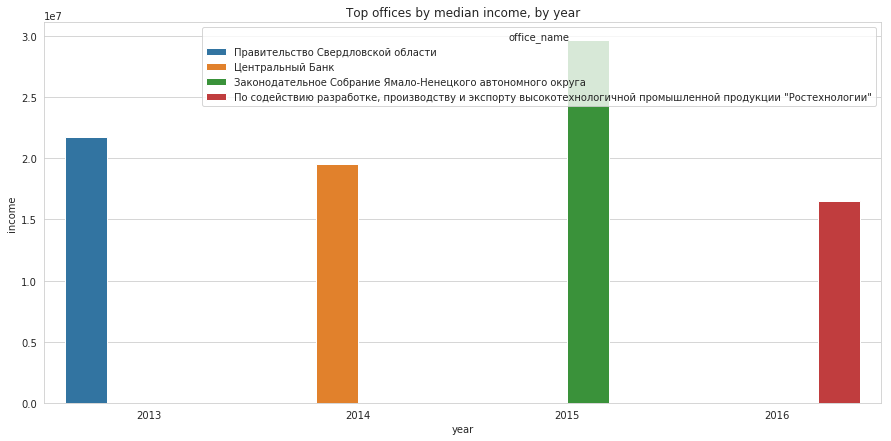

In [123]:
# Top offices by median income, by year
tdf= big_office_declarations.groupby(['year', 'office_name'])['income'].median().reset_index()
tdf2 = tdf.groupby('year')['income'].max().reset_index()
tdf_final = tdf.merge(tdf2, on=['year', 'income'], how='inner')
tdf_final.office_name = tdf_final.office_name.apply(lambda x: x.replace('\n', ' '))
plt.figure(figsize=(15,7))
plt.title('Top offices by median income, by year')
sns.barplot(x='year', y='income', hue='office_name', data=tdf_final)
plt.show()

### Income distributions
* Income percentile distributions

In [125]:
percentiles = [0, 0.75, 0.95, 0.99, 0.9999, 1]
labels = ['p'+str(percentiles[i-1]) +' - ' +str(percentiles[i]) for i in range(1, len(percentiles))]
qcut, bins = pd.qcut(income_sum, percentiles, labels=labels, retbins=True)

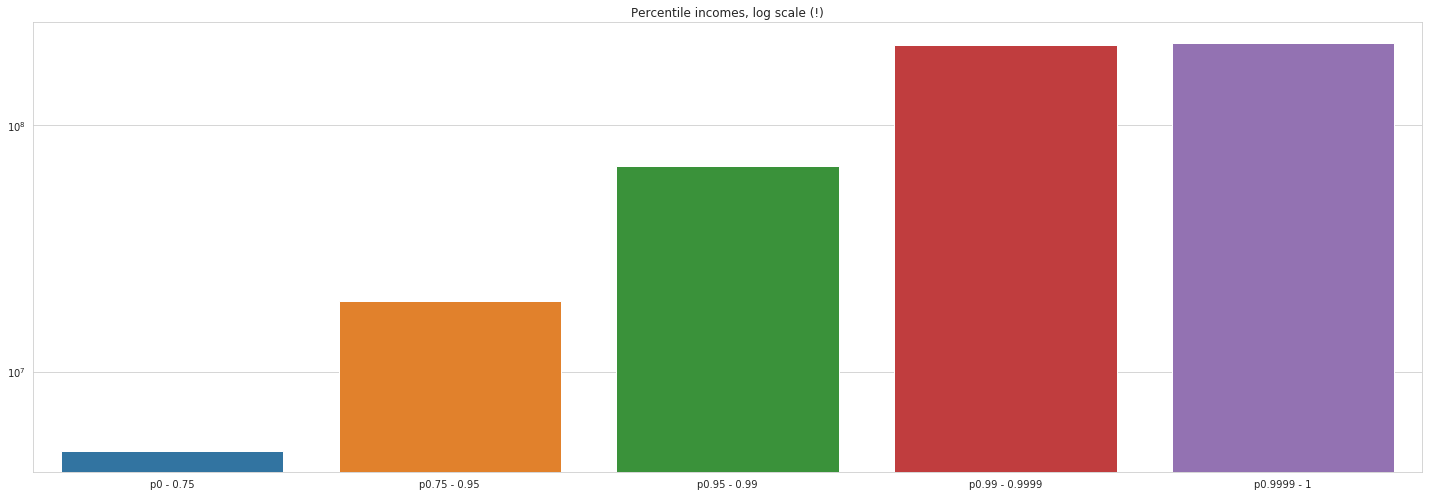

In [127]:
plt.figure(figsize=(20, 7))
plt.title('Percentile incomes, log scale (!)')
sns.barplot(labels, bins[1:])
plt.yscale('log')
save_pic('perc_inc_log')
plt.show()

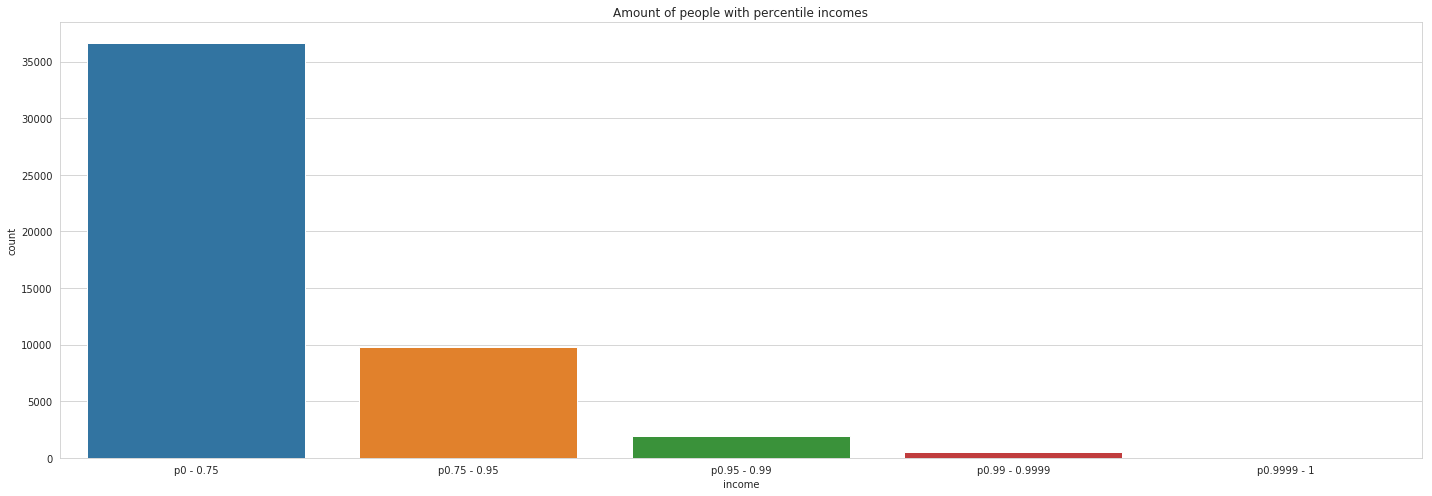

In [128]:
plt.figure(figsize=(20, 7))
plt.title('Amount of people with percentile incomes')
sns.countplot(qcut)
save_pic('perc_am_log')
plt.show()

Total income


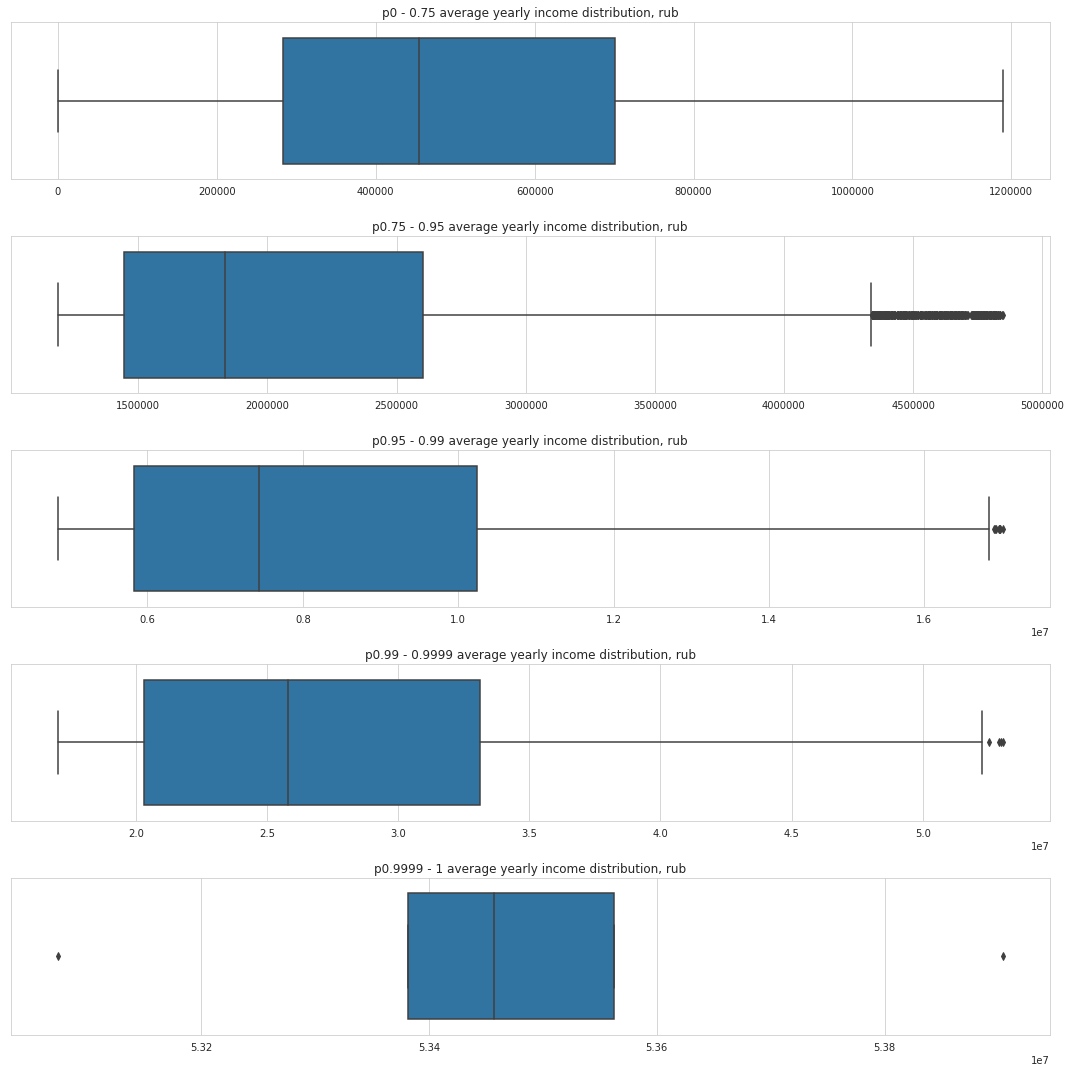

In [142]:
print('Total income')
income_yearly = income_sum / len(years)

plt.figure(figsize=(15, 15))

for i, percentile in enumerate(labels):
    plt.subplot(len(labels), 1, i+1)
    percentile_persons = qcut[qcut == percentile].index
    
    percentile_income = income_yearly.loc[percentile_persons]
    
    plt.title(percentile +' average yearly income distribution, rub')
    millions_xlabel = False
    sns.boxplot(percentile_income, orient='h')
    plt.xlabel('')
save_pic('boxplots_perc')
plt.show()

Total income


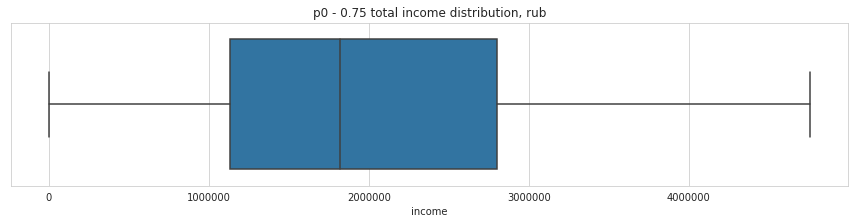

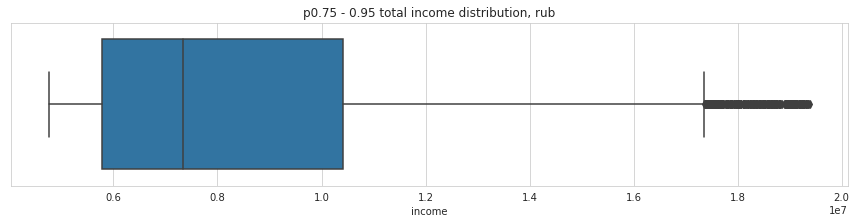

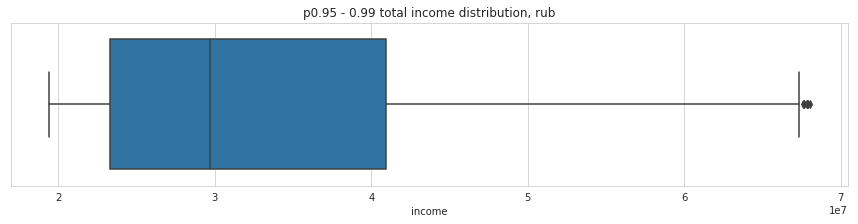

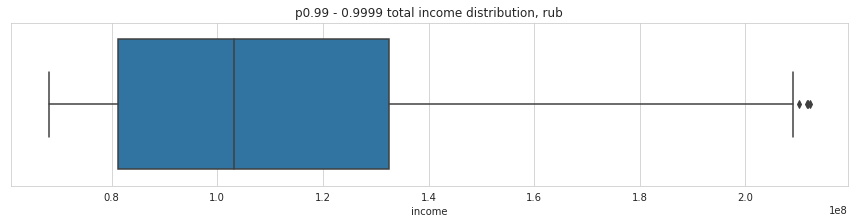

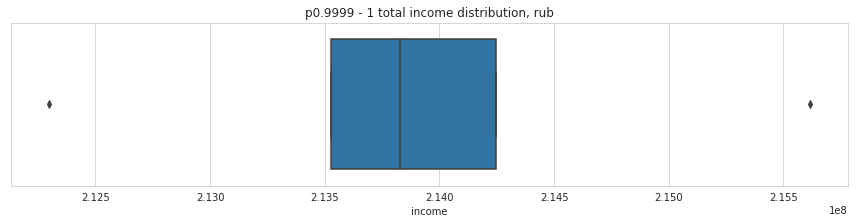

In [152]:
print('Total income')
for percentile in labels:
    percentile_persons = qcut[qcut == percentile].index
    
    percentile_income = income_sum.loc[percentile_persons]
    
    plt.figure(figsize=(15, 3))
    plt.title(percentile +' total income distribution, rub')
    millions_xlabel = False
    sns.boxplot(percentile_income)
    plt.show()

In [153]:
final_df = pd.DataFrame(index=range(1, 11))
for year in declarations_df.year.unique():
    tdf = declarations_df[declarations_df.year == year].groupby(['person_name'])['income'].sum().sort_values(ascending=False)
    top_10 = list(tdf.head(10).index)
    final_df[year] = top_10

print('Top 10 people by income, each year')
final_df

Top 10 people by income, each year


,2013,2014,2015,2016
1,Токарев Николай Петрович,Эфендиев Назим Тофик,Корелин Владимир Владимирович,Пристансков Дмитрий Владимирович
2,Варфоломеев Александр Георгиевич,Сорокин Олег Валентинович,Тихонычева Эльмира Эрнестовна,Панеш Батырбий Мугдинович
3,Макаров Андрей Михайлович,Шлычков Евгений Иванович,Черкезов Владимир Аванесович,Синяговский Владимир Ильич
4,Бударгин Олег Михайлович,Гозман Константин Маркович,Каноков Арсен Баширович,Грищенко Олег Васильевич
5,Клишас Андрей Александрович,Гумеров Флун Фагимович,Маркитантов Олег Александрович,Чекотова Нина Алексеевна
6,Михайлов Сергей Владимирович,Илуров С. Д.,Волков Андрей Александрович,Цехомский Николай Викторович
7,Паланкоев Ахмет Магомедович,Лакути Георгий Борисович,Дериглазов Игорь Анатольевич,Смирнов Юрий Валентинович
8,Морозов Олег Викторович,Терешков Дмитрий Михайлович,Донских Сергей Леонидович,Гольберт Владимир Львович
9,Исаев Юрий Олегович,Рачков Сергей Геннадьевич,Завальнев Игорь Николаевич,Никифоров Вячеслав Иванович
10,Улюкаев Алексей Валентинович,Акчурин Ильдар Анвярович,Данильченко Юрий Михайлович,Гартунг Валерий Карлович


In [154]:
years_worked = declarations_df.groupby(['person_id'])['year'].nunique()
years_worked.name = 'years worked'
years_worked.head()

person_id
8     4
9     4
10    3
12    4
13    4
Name: years worked, dtype: int64

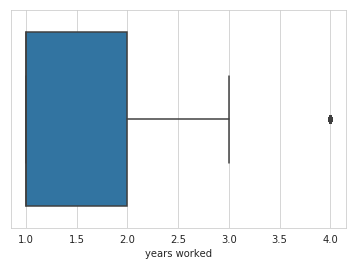

In [155]:
plt.figure()
sns.boxplot(years_worked)
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


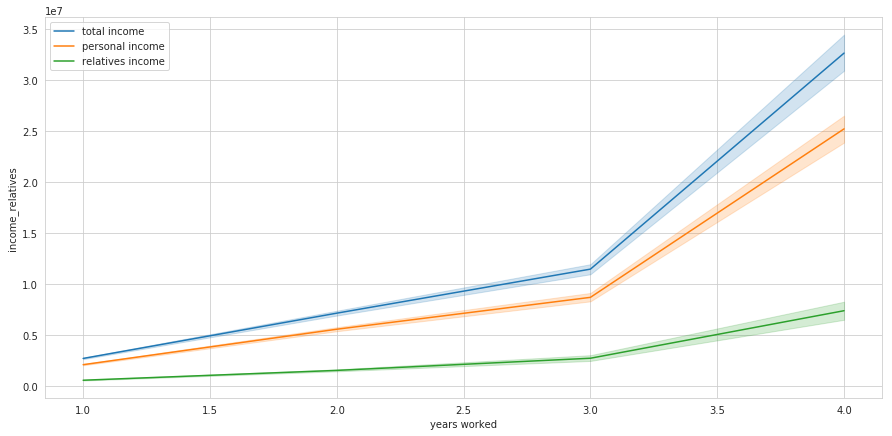

In [160]:
income_df = declarations_df.groupby(['person_id'])['income', 'income_personal', 'income_relatives'].sum()
income_df = income_df.loc[years_worked.index]
plt.figure(figsize=(15, 7))
sns.lineplot(years_worked, income_df.income, label ='total income')
sns.lineplot(years_worked, income_df.income_personal, label='personal income')
sns.lineplot(years_worked, income_df.income_relatives, label='relatives income')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


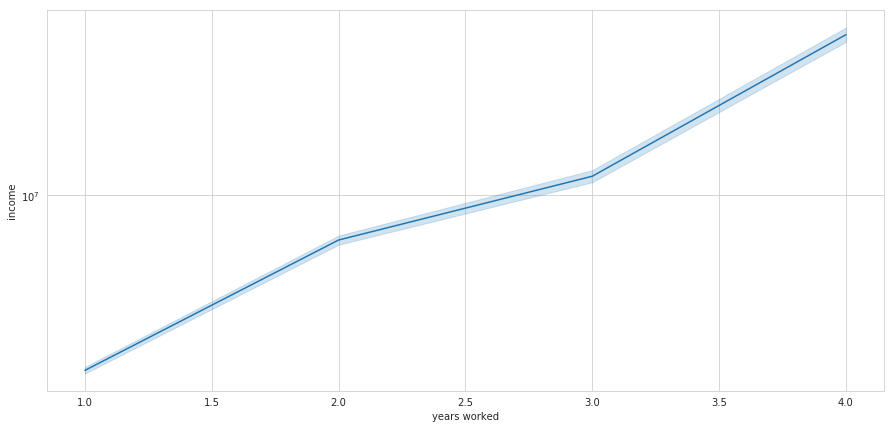

In [162]:
# We can observe a log dependency
plt.figure(figsize=(15, 7))
sns.lineplot(years_worked, income.income)
plt.yscale('log')
plt.show()

In [163]:
print('Median', income.median())

print('Std', income.std())

Median income              2426328.71
income_personal     1890224.00
income_relatives     277507.34
dtype: float64
Std income              1.346174e+07
income_personal     1.092995e+07
income_relatives    5.844788e+06
dtype: float64


In [77]:
print('Median', income_filtered.median())

print('Std', income_filtered.std())

Median 2371090.3950000005
Std 5235161.020718993
